In [5]:
from tbparse import SummaryReader

## Question 1b

### Ant-v4

In [6]:
log_dir = "./data/q1_bc_ant_Ant-v4_18-02-2026_13-44-38/"
reader = SummaryReader(log_dir)
df = reader.scalars
print(df.head(50))

    step                                   tag        value
0      0                     Eval_AverageEpLen  1000.000000
1      0                    Eval_AverageReturn  4601.469727
2      0                        Eval_MaxReturn  4703.592285
3      0                        Eval_MinReturn  4425.279297
4      0                        Eval_StdReturn    98.333435
5      0  Initial_DataCollection_AverageReturn  4713.653320
6      0                        TimeSinceStart    13.872137
7      0                    Train_AverageEpLen  1000.000000
8      0                   Train_AverageReturn  4713.653320
9      0                   Train_EnvstepsSoFar  2000.000000
10     0                       Train_MaxReturn  4725.849609
11     0                       Train_MinReturn  4701.456543
12     0                       Train_StdReturn    12.196533
13     0                         Training Loss     0.000631


### HalfCheetah-v4

In [7]:
log_dir = "./data/q1_bc_halfcheetah_HalfCheetah-v4_18-02-2026_23-26-08/"
reader = SummaryReader(log_dir)
df = reader.scalars
print(df.head(50))

    step                                   tag        value
0      0                     Eval_AverageEpLen  1000.000000
1      0                    Eval_AverageReturn  3833.641357
2      0                        Eval_MaxReturn  3904.110840
3      0                        Eval_MinReturn  3727.942627
4      0                        Eval_StdReturn    61.327606
5      0  Initial_DataCollection_AverageReturn  4205.778320
6      0                        TimeSinceStart    19.600740
7      0                    Train_AverageEpLen  1000.000000
8      0                   Train_AverageReturn  4205.778320
9      0                   Train_EnvstepsSoFar  2000.000000
10     0                       Train_MaxReturn  4288.816895
11     0                       Train_MinReturn  4122.739258
12     0                       Train_StdReturn    83.038818
13     0                         Training Loss     0.014761


## Question 1c

### Ant-v4

In [62]:
hp_sweep_run_names = [
    'q1_bc_ant_num_steps_10_Ant-v4_18-02-2026_13-50-25',
    'q1_bc_ant_num_steps_50_Ant-v4_18-02-2026_13-50-41',
    'q1_bc_ant_num_steps_100_Ant-v4_18-02-2026_13-50-55',
    'q1_bc_ant_num_steps_500_Ant-v4_18-02-2026_13-51-14',
    'q1_bc_ant_num_steps_1000_Ant-v4_18-02-2026_13-51-56',
    'q1_bc_ant_num_steps_5000_Ant-v4_18-02-2026_13-51-34',
    'q1_bc_ant_num_steps_10000_Ant-v4_18-02-2026_13-52-15',
    'q1_bc_ant_num_steps_50000_Ant-v4_18-02-2026_13-52-43',
    'q1_bc_ant_num_steps_100000_Ant-v4_18-02-2026_13-53-58'    
]

hp_size_values = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]

In [63]:
returns_mean = [-1000.0 for _ in range(len(hp_sweep_run_names))]
returns_stdev = [1000.0 for _ in range(len(hp_sweep_run_names))]

for i, hp_sweep_run_name in enumerate(hp_sweep_run_names):
    reader = SummaryReader(f'./data/{hp_sweep_run_name}')
    df = reader.scalars
    returns_mean[i] = df[df.tag == 'Eval_AverageReturn'].value.iloc[0]
    returns_stdev[i] = df[df.tag == 'Eval_StdReturn'].value.iloc[0]

In [64]:
import pandas as pd
import matplotlib.pyplot as plt


out_df = pd.DataFrame(
    data = {
        'Eval_AverageReturn': returns_mean,
        'Eval_StdReturn': returns_stdev
    },
    index = hp_size_values
)

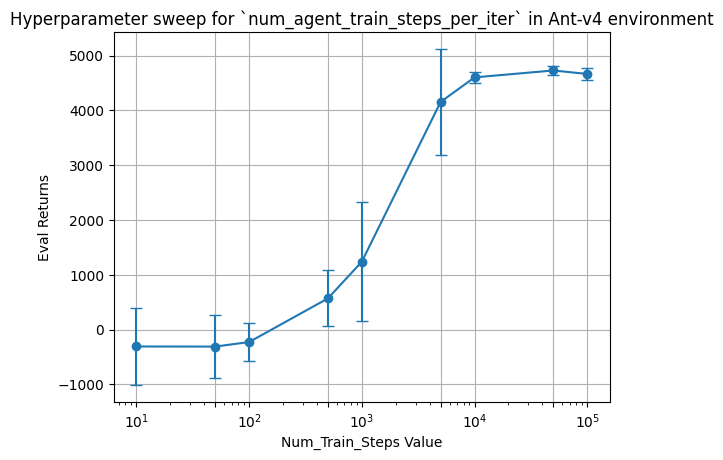

In [65]:
ax = out_df['Eval_AverageReturn'].plot(kind='line', yerr=out_df['Eval_StdReturn'], capsize=4, marker='o')

ax.set_title('Hyperparameter sweep for `num_agent_train_steps_per_iter` in Ant-v4 environment')
ax.set_xlabel('Num_Train_Steps Value')
ax.set_ylabel('Eval Returns')

plt.xscale('log', base=10)
ax.set_xticks(hp_size_values)

plt.grid(True)

plt.savefig('../../tex/plots/Ant-v4_HPSweep.png')

### HalfCheetah-v4

In [66]:
hp_sweep_run_names = [
    'q1_bc_halfcheetah_size_2_HalfCheetah-v4_18-02-2026_13-47-20',
    'q1_bc_halfcheetah_size_4_HalfCheetah-v4_18-02-2026_13-46-55',
    'q1_bc_halfcheetah_size_8_HalfCheetah-v4_18-02-2026_13-46-23',
    'q1_bc_halfcheetah_size_16_HalfCheetah-v4_18-02-2026_13-47-45',
    'q1_bc_halfcheetah_size_32_HalfCheetah-v4_18-02-2026_13-48-16',
    'q1_bc_halfcheetah_size_64_HalfCheetah-v4_18-02-2026_13-48-58',
    'q1_bc_halfcheetah_size_128_HalfCheetah-v4_18-02-2026_13-57-13',
    'q1_bc_halfcheetah_size_256_HalfCheetah-v4_18-02-2026_13-57-52',
    'q1_bc_halfcheetah_size_512_HalfCheetah-v4_18-02-2026_13-58-32',
    'q1_bc_halfcheetah_size_1024_HalfCheetah-v4_18-02-2026_13-59-33'
]

hp_size_values = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

In [67]:
returns_mean = [-1000.0 for _ in range(len(hp_sweep_run_names))]
returns_stdev = [1000.0 for _ in range(len(hp_sweep_run_names))]

for i, hp_sweep_run_name in enumerate(hp_sweep_run_names):
    reader = SummaryReader(f'./data/{hp_sweep_run_name}')
    df = reader.scalars
    returns_mean[i] = df[df.tag == 'Eval_AverageReturn'].value.iloc[0]
    returns_stdev[i] = df[df.tag == 'Eval_StdReturn'].value.iloc[0]

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
out_df = pd.DataFrame(
    data = {
        'Eval_AverageReturn': returns_mean,
        'Eval_StdReturn': returns_stdev
    },
    index = hp_size_values
)

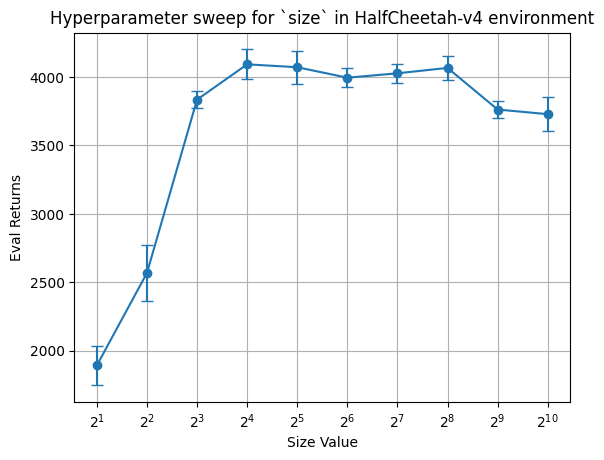

In [70]:
ax = out_df['Eval_AverageReturn'].plot(kind='line', yerr=out_df['Eval_StdReturn'], capsize=4, marker='o')

ax.set_title('Hyperparameter sweep for `size` in HalfCheetah-v4 environment')
ax.set_xlabel('Size Value')
ax.set_ylabel('Eval Returns')

plt.xscale('log', base=2)
ax.set_xticks(hp_size_values)

plt.grid(True)

plt.savefig('../../tex/plots/HalfCheetah-v4_HPSweep.png')

## Question 2b

### Ant-v4

#### BC

In [139]:
log_dir = "./data/q1_bc_ant_Ant-v4_18-02-2026_13-44-38/"
reader = SummaryReader(log_dir)
df = reader.scalars

behavior_cloning_agent = (df[df.tag == 'Eval_AverageReturn'].value.iloc[0])

#### DAgger

In [140]:
log_dir = "./data/q2_dagger_ant_Ant-v4_18-02-2026_14-00-31/"
reader = SummaryReader(log_dir)
df = reader.scalars

In [141]:
returns_mean = [-1000.0 for _ in range(10)]
returns_stdev = [1000.0 for _ in range(10)]

for idx, row in df.iterrows():
    if row.tag == 'Eval_AverageReturn':
        returns_mean[row['step']] = row['value']
    if row.tag == 'Eval_StdReturn':
        returns_stdev[row['step']] = row['value']

assert len(returns_mean) == len(returns_stdev)

#### Plot

In [142]:
import pandas as pd
import matplotlib.pyplot as plt


out_df = pd.DataFrame(
    data = {
        'Eval_AverageReturn': returns_mean,
        'Eval_StdReturn': returns_stdev
    },
    index = [i for i in range(len(returns_mean))]
)

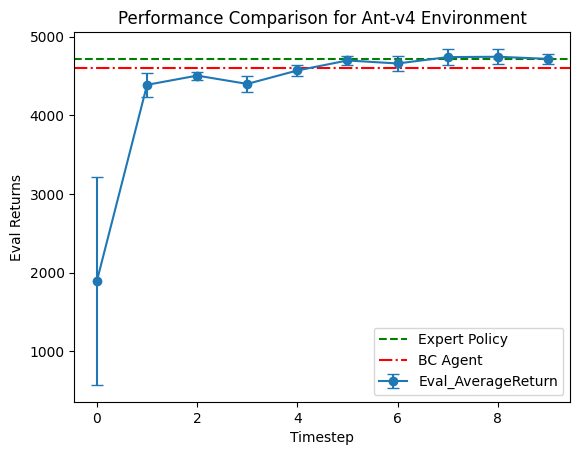

In [143]:
ax = out_df['Eval_AverageReturn'].plot(kind='line', yerr=out_df['Eval_StdReturn'], capsize=4, marker='o')

ax.set_title('Performance Comparison for Ant-v4 Environment')
ax.set_xlabel('Timestep')
ax.set_ylabel('Eval Returns')
ax.legend(['DAgger'])

expert_policy = (df[df.tag == 'Initial_DataCollection_AverageReturn'].value.iloc[0])
ax.axhline(y=expert_policy, color='g', linestyle='--', label='Expert Policy')

ax.axhline(y=behavior_cloning_agent, color='r', linestyle='-.', label='BC Agent')

plt.legend()
plt.savefig('../../tex/plots/Ant-v4_DAgger.png')

### HalfCheetah-v4

#### BC

In [144]:
log_dir = "./data/q1_bc_halfcheetah_HalfCheetah-v4_18-02-2026_23-26-08/"
reader = SummaryReader(log_dir)
df = reader.scalars

behavior_cloning_agent = (df[df.tag == 'Eval_AverageReturn'].value.iloc[0])

#### DAgger

In [145]:
log_dir = "./data/q2_dagger_halfcheetah_HalfCheetah-v4_18-02-2026_14-02-48/"
reader = SummaryReader(log_dir)
df = reader.scalars

In [146]:
returns_mean = [-1000.0 for _ in range(10)]
returns_stdev = [1000.0 for _ in range(10)]

for idx, row in df.iterrows():
    if row.tag == 'Eval_AverageReturn':
        returns_mean[row['step']] = row['value']
    if row.tag == 'Eval_StdReturn':
        returns_stdev[row['step']] = row['value']

assert len(returns_mean) == len(returns_stdev)

#### Plot

In [147]:
import pandas as pd
import matplotlib.pyplot as plt


out_df = pd.DataFrame(
    data = {
        'Eval_AverageReturn': returns_mean,
        'Eval_StdReturn': returns_stdev
    },
    index = [i for i in range(len(returns_mean))]
)

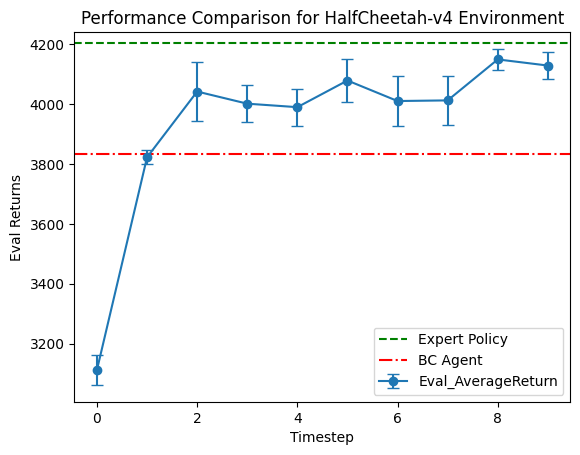

In [148]:
ax = out_df['Eval_AverageReturn'].plot(kind='line', yerr=out_df['Eval_StdReturn'], capsize=4, marker='o')

ax.set_title('Performance Comparison for HalfCheetah-v4 Environment')
ax.set_xlabel('Timestep')
ax.set_ylabel('Eval Returns')
ax.legend(['DAgger'])

expert_policy = (df[df.tag == 'Initial_DataCollection_AverageReturn'].value.iloc[0])
ax.axhline(y=expert_policy, color='g', linestyle='--', label='Expert Policy')

ax.axhline(y=behavior_cloning_agent, color='r', linestyle='-.', label='BC Agent')

plt.legend()
plt.savefig('../../tex/plots/HalfCheetah-v4_DAgger.png')